In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('..\ExploratoryDataAnalysis\google-play-store-apps\googleplaystore.csv')



In [4]:
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Data Cleaning
1. Remove '+' from 'Number of Installs'
2. Convert app size to MB
3. Remove 'NaN'
4. Remove '$' from 'Price'
5. Convert 'String' to 'int' or 'float'

In [6]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))



In [7]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
                              if "Varies with device" in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace('M','') 
                              if 'M' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace(',','') 
                              if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') 
                              if '+' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: float(str(x).replace('k','') )/1024
                              if 'k' in str(x) else x)

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

df['Price'] = df['Price'].apply(lambda x: float(x))


In [78]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x) )

In [8]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [9]:
df.describe()

,Rating,Installs,Price
count,8196.000000,9.659000e+03,9659.000000
mean,4.173243,7.777507e+06,1.099299
std,0.536625,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,1.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


### Market Share of Different App Categories

In [10]:
categorycount = df['Category'].value_counts().sort_values(ascending = True)

categorydata = [go.Pie(labels = categorycount.index,values = categorycount.values,hoverinfo = 'label+value')]

plotly.offline.iplot(categorydata, filename='active_category')

### Distribution of Downloads

Text(0, 0.5, 'Frequency')

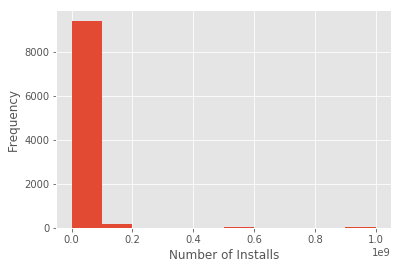

In [11]:
df.Installs.hist()
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')


In [12]:
df.groupby('Type').describe()

Rating                                              Installs  \
       count      mean       std  min  25%  50%  75%  max    count   
Type                                                                 
Free  7592.0  4.166372  0.534163  1.0  4.0  4.3  4.5  5.0   8902.0   
Paid   604.0  4.259603  0.559961  1.0  4.1  4.4  4.6  5.0    756.0   

                    ...                            Price             \
              mean  ...        75%           max   count       mean   
Type                ...                                               
Free  8.432439e+06  ...  1000000.0  1.000000e+09  8902.0   0.000000   
Paid  7.587947e+04  ...    10000.0  1.000000e+07   756.0  14.045146   

                                                
            std   min   25%   50%   75%    max  
Type                                            
Free   0.000000  0.00  0.00  0.00  0.00    0.0  
Paid  58.743615  0.99  1.49  2.99  4.99  400.0  

[2 rows x 24 columns]

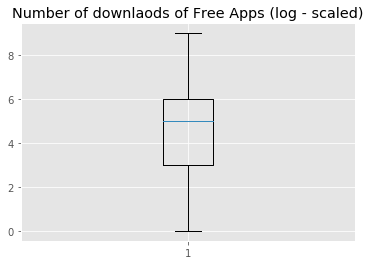

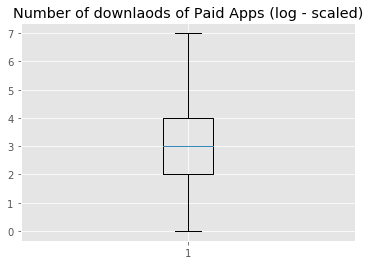

In [19]:
y = np.log10(df['Installs'][df.Type=='Free']) 
x = np.log10(df['Installs'][df.Type=='Paid']) 

plt.boxplot(y) 
plt.title("Number of downlaods of Free Apps (log - scaled)")
plt.show()
plt.boxplot(x) 
plt.title("Number of downlaods of Paid Apps (log - scaled)")
plt.show()

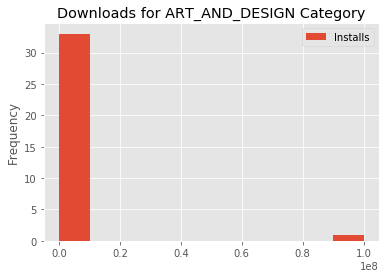

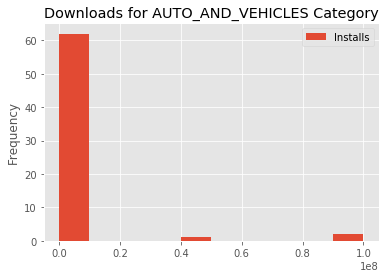

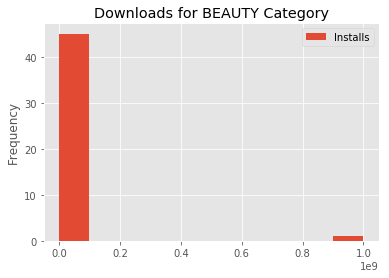

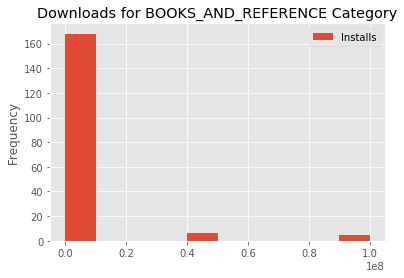

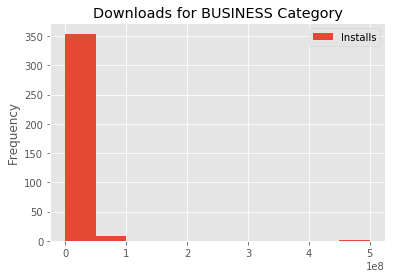

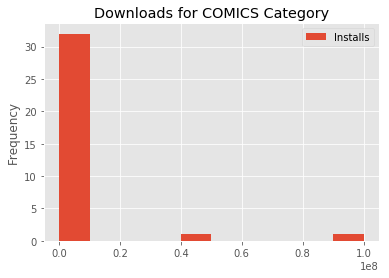

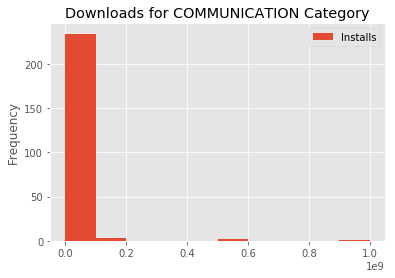

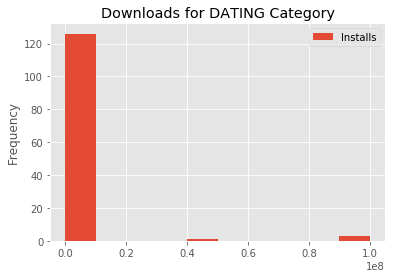

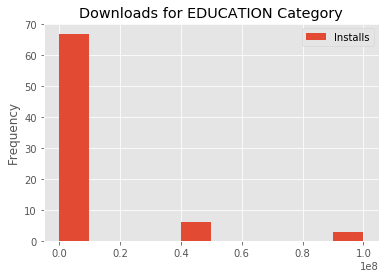

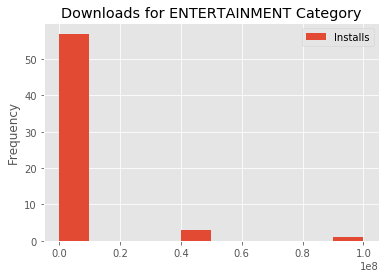

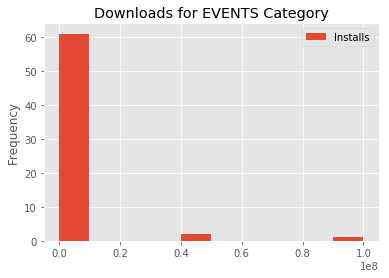

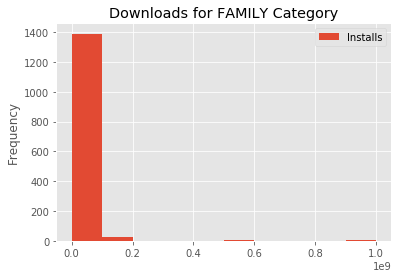

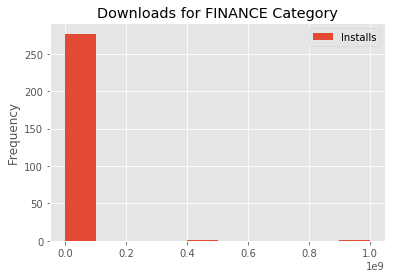

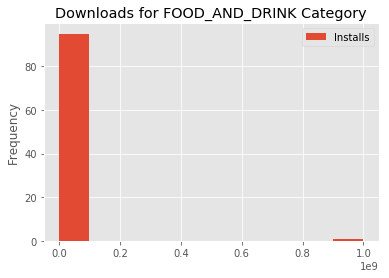

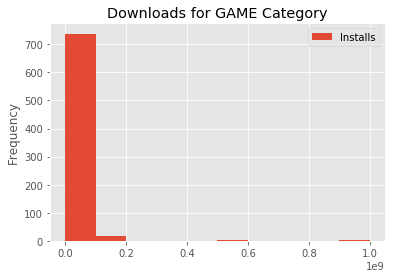

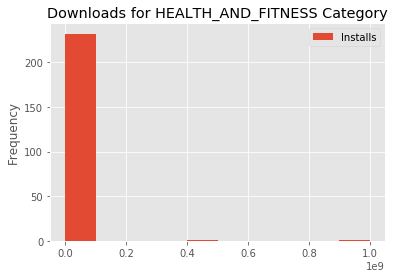

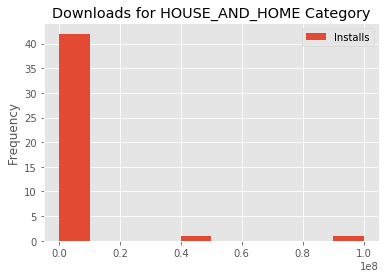

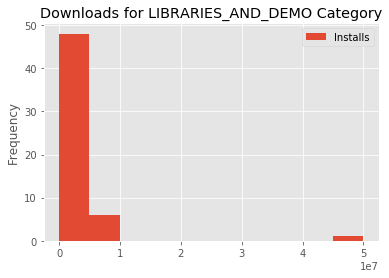

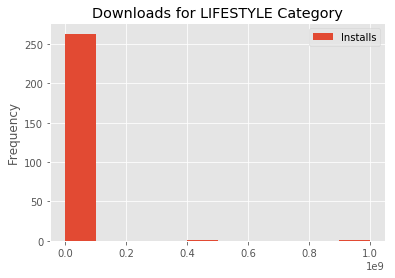

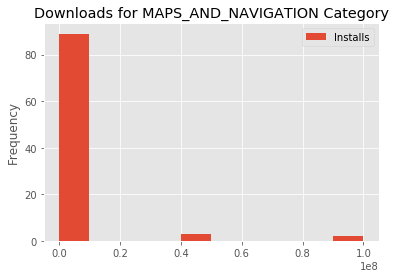

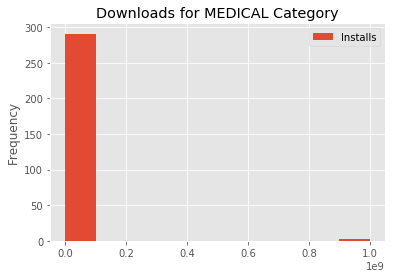

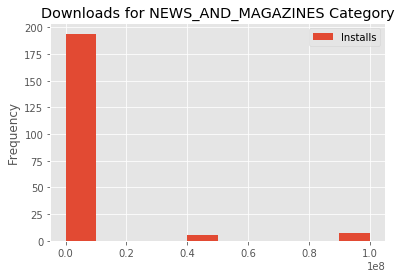

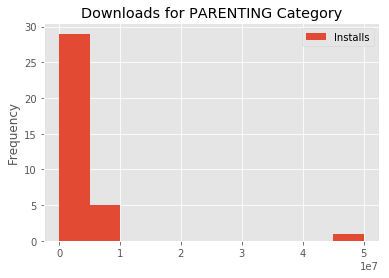

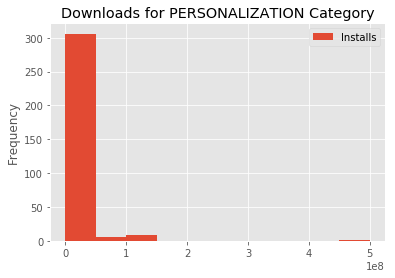

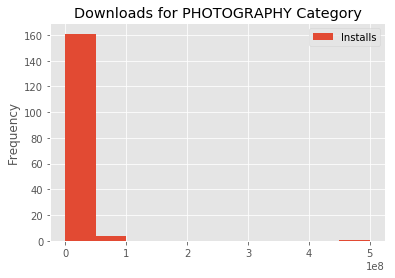

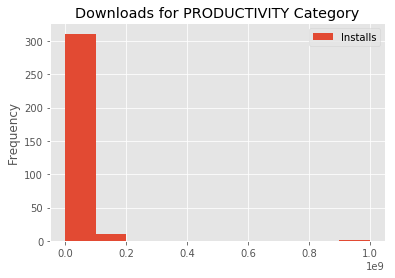

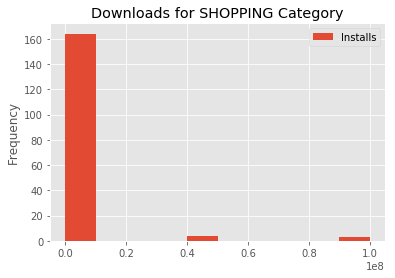

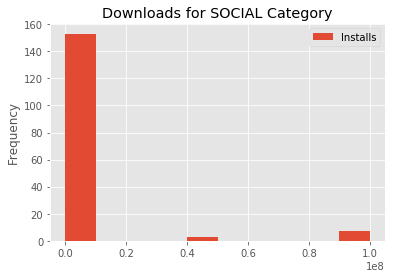

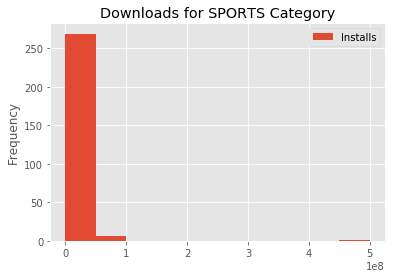

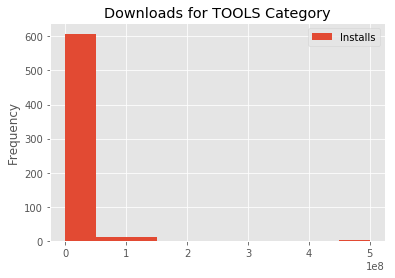

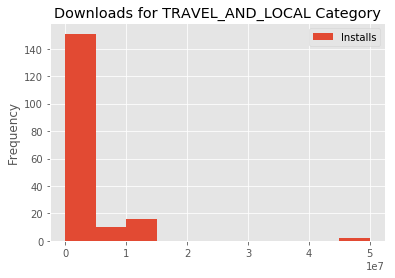

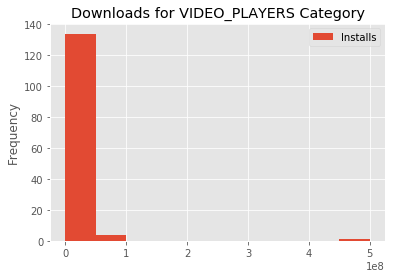

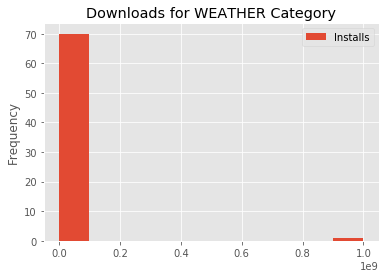

In [79]:
tempdf = df[['Category','Installs']]
new_df = tempdf.groupby(['Category'])

axes = new_df.plot(kind='hist')
for i, (groupname, group) in enumerate(new_df):
    axes[i].set_title("Downloads for "+ groupname + " Category")


#### Relation between downloads and ratings

In [105]:
data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Installs'].dropna(),
    'type':'scatter',
    'y' : temp_df['Rating'].dropna(),
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Installs vs Rating", 
          'xaxis': {'title' : 'Installs'},
          'yaxis' : {'title' : 'Rating'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})


#### Relation between downloads and number of reviews

In [110]:
data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : np.log10(df['Installs'].apply(lambda x : int(x))),
    'type':'scatter',
    'y' : np.log10(df['Reviews'].apply(lambda x : int(x))),
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Installs vs Reviews (log scaled)", 
          'xaxis': {'title' : 'Installs'},
          'yaxis' : {'title' : 'Reviews'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})


### Sentiment Analysis

In [90]:
reviews_df = pd.read_csv('..\Downloads\google-play-store-apps\googleplaystore_user_reviews.csv')

In [91]:
concatdf = pd.merge(df, reviews_df, on = "App", how = "inner")
concatdf = concatdf.dropna(subset=['Translated_Review', 'Sentiment'])

In [92]:
concatdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
7,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
8,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
9,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
10,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
11,Coloring book moana,FAMILY,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667


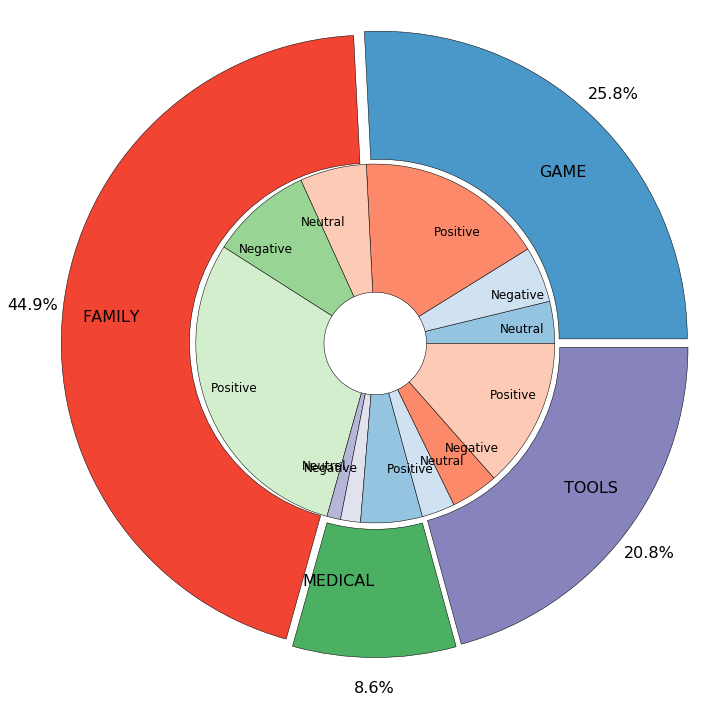

In [113]:
new_df = concatdf.groupby(['Category', 'Sentiment']).agg({'App' : 'count'}).reset_index()
outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(concatdf.App[concatdf.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
inner_group_names = ['Neutral', 'Negative', 'Positive'] * 4
inner_group_values = []
for category in outer_group_names:
    for t in ['Neutral', 'Negative', 'Positive']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Sentiment == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()


